In [1]:
import torch
from models import BaseTransformer, CTCTransformer
from pipeline import TransformerPipeline

# Load data
data = torch.load("../Test_dict_align.pt")

In [2]:
# Load data
# data = torch.load("../data.pt")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Small subset
data = {
    "features": data["features"][:1],  # 10 examples
    "gloss": data["gloss"][:1]
}

In [3]:
# Initialize pipeline
pipeline = TransformerPipeline(device, 'ctc-transformer')

# Create loaders
train_loader, val_loader, test_loader = pipeline.process_data(
    data = data, 
    batch_size = 8,
    chunk_size = 256,
    stride = None,
    alignment = True,
    shuffle = True,
    train_ratio = 0.8,
    val_ratio = 0.1,
)

# Initialize model
model = CTCTransformer(
    input_dim = data["features"][0][0].shape[1],
    vocab_size = pipeline.vocabulary.size,
    d_model = 256,
    nhead = 4,
    num_layers = 2,
    dim_feedforward = 512,
    dropout = 0,
    max_len = 5000,
    use_cnn = True,
).to(device)

# Train model
metrics = pipeline.train_model(
    model = model, 
    train_loader = train_loader, 
    val_loader = val_loader, 
    epochs = 200, 
    early_stop = None,
    lr = 1e-4,
)


Epoch 1/200: 100%|██████████| 2/2 [00:00<00:00,  4.01it/s, Loss=31.3141]
c:\Users\noedo\anaconda3\Lib\site-packages\torch\nn\modules\transformer.py:505: UserWarning: The PyTorch API of nested tensors is in prototype stage and will change in the near future. We recommend specifying layout=torch.jagged when constructing a nested tensor, as this layout receives active development, has better operator coverage, and works with torch.compile. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\NestedTensorImpl.cpp:182.)
  output = torch._nested_tensor_from_mask(
Epoch 53/200:   0%|          | 0/2 [00:00<?, ?it/s]


KeyboardInterrupt: 

Test WER: 0.03
['PÅ', 'PRO1', 'zzz@&', 'HEJ', 'HANDSKAKA', 'HANDSKAKA@rd', 'PU-SÅ-ÄR-DET@g', 'KÄNNA', 'PERSON.PL', 'GAMMAL(5)', 'PERSON.FL', 'BRIDGE', 'FÖRUT', 'SEDAN(L)', 'KVÄLL', 'FEST', 'fest@hd', 'PRO1', 'PERF-NEG', 'DEL', 'PRO1', 'RÄDD', 'rädd@hd', 'RÄDD', 'MÖRK', 'UTE', 'VARA']
27
['PÅ', 'PRO1', 'zzz@&', 'HEJ', 'HANDSKAKA', 'HANDSKAKA@rd', 'PU-SÅ-ÄR-DET@g', 'KÄNNA', 'PERSON.PL', 'GAMMAL(5)', 'PERSON.FL', 'BRIDGE', 'FÖRUT', 'SEDAN(L)', 'KVÄLL', 'FEST', 'fest@hd', 'PRO1', 'PERF-NEG', 'DEL', 'PRO1', 'RÄDD', 'rädd@hd', 'RÄDD', 'MÖRK', 'UTE']
26


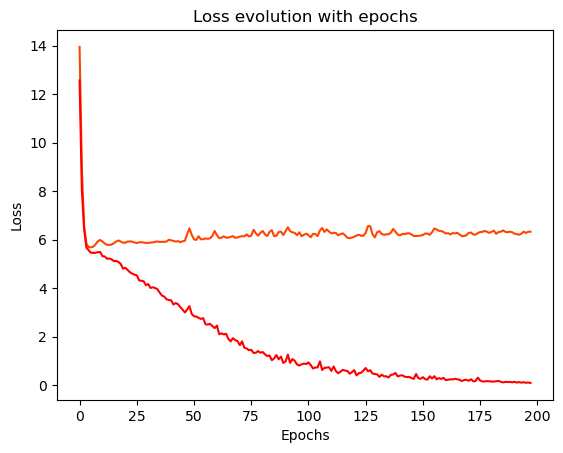

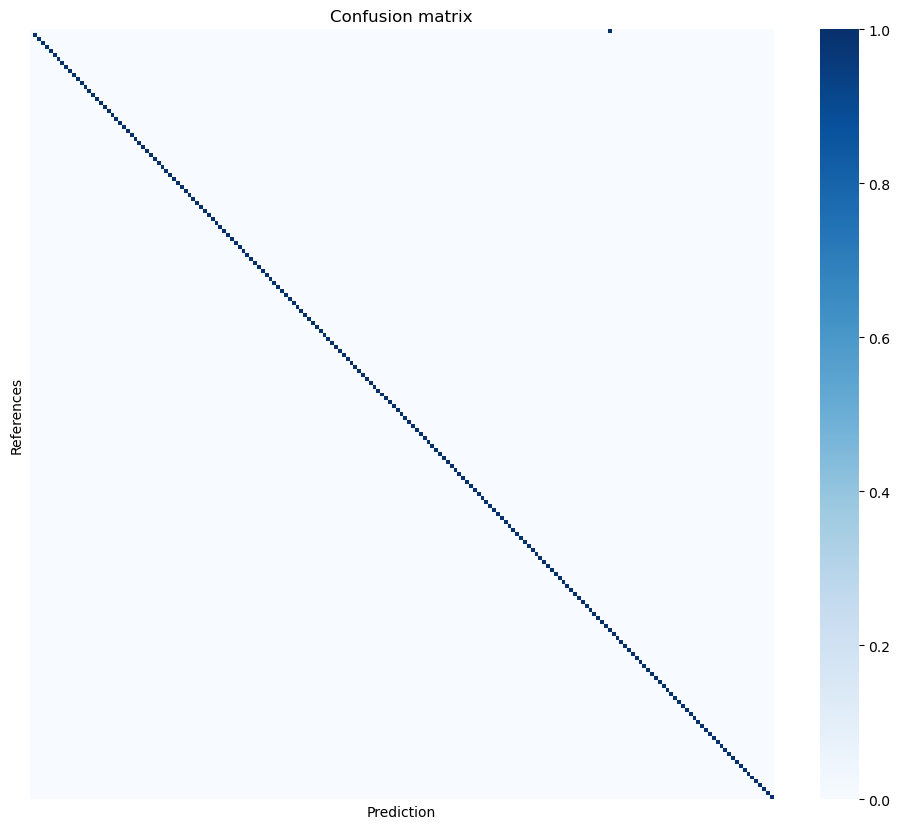

In [5]:
from analytics import display_confusion_matrix, display_metrics

wer_score, pred_sequences, ref_sequences = pipeline.test_model(model, train_loader)
print(pred_sequences[0])
print(len(pred_sequences[0]))
print(ref_sequences[0])
print(len(ref_sequences[0]))

display_metrics(metrics)
display_confusion_matrix(pred_sequences, ref_sequences)

In [7]:
# Initialize pipeline
from compare import TransformerPipeline2
pipeline = TransformerPipeline2(device, 'ctc-transformer')

# Create loaders
train_loader, val_loader, test_loader = pipeline.process_data(
    data = data, 
    batch_size = 8,
    chunk_size = 256,
    stride = None,
    alignment = True,
    shuffle = True,
    train_ratio = 0.8,
    val_ratio = 0.1,
)

# Initialize model
model = CTCTransformer(
    input_dim = data["features"][0][0].shape[1],
    vocab_size = pipeline.vocabulary.size,
    d_model = 256,
    nhead = 4,
    num_layers = 2,
    dim_feedforward = 512,
    dropout = 0,
    max_len = 5000,
    use_cnn = True,
).to(device)

# Train model
metrics = pipeline.train_model(
    model = model, 
    train_loader = train_loader, 
    val_loader = val_loader, 
    epochs = 200, 
    early_stop = None,
    lr = 1e-4,
)


Epoch 200/200: 100%|██████████| 2/2 [00:00<00:00,  5.42it/s, Loss=0.0890]


Test WER: 0.05
['HÖJA', 'ELLER', 'INTE', 'inte@hd', 'ORSAK', 'VAD', 'DISKUTERA', 'PEK', 'VIKTIG', 'GLOSA:NÄSTA.FL', 'TA-BORT', 'PEK', 'NU@b', 'PU-VARSÅGOD@g', 'pu-varsågod@hd', 'INGEN', 'DISKUTERA', 'GLOSA:ORDFÖRANDEKLUBBA-SLÅ', 'FÄRDIG', 'GLOSA:(PERF-NEG)', 'GLOSA:(?)', 'SEDAN(L)', 'PERSREF1@pr', 'FÖRSÖKA', 'HÄRMA', 'OBJPRO1', 'JA@ub', 'TYCKA', 'SNABB@b', 'PRO1', 'SKA', 'MÖTE(S)', 'SKA', 'ROLIG', 'FÖRE']
35
['HÖJA', 'ELLER', 'INTE', 'inte@hd', 'ORSAK', 'VAD', 'DISKUTERA', 'PEK', 'VIKTIG', 'GLOSA:NÄSTA.FL', 'TA-BORT', 'PEK', 'NU@b', 'PU-VARSÅGOD@g', 'pu-varsågod@hd', 'INGEN', 'DISKUTERA', 'GLOSA:ORDFÖRANDEKLUBBA-SLÅ', 'FÄRDIG', 'GLOSA:(PERF-NEG)', 'GLOSA:(?)', 'SEDAN(L)', 'PERSREF1@pr', 'FÖRSÖKA', 'HÄRMA', 'OBJPRO1', 'JA@ub', 'TYCKA', 'SNABB@b', 'PRO1', 'SKA', 'MÖTE(S)', 'SKA', 'ROLIG']
34


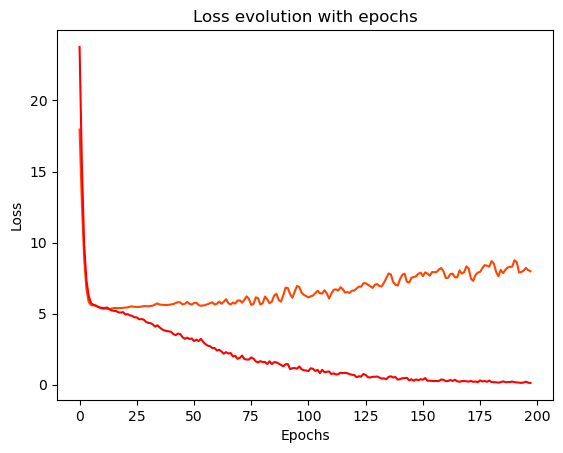

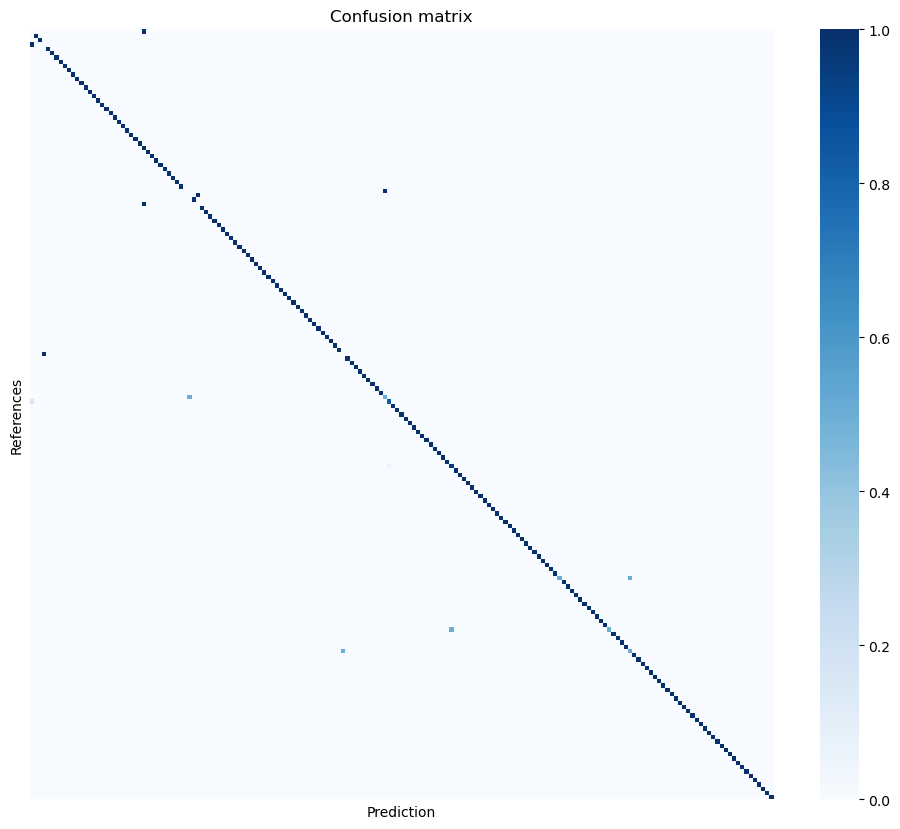

In [8]:
from analytics import display_confusion_matrix, display_metrics

wer_score, pred_sequences, ref_sequences = pipeline.test_model(model, train_loader)
print(pred_sequences[0])
print(len(pred_sequences[0]))
print(ref_sequences[0])
print(len(ref_sequences[0]))

display_metrics(metrics)
display_confusion_matrix(pred_sequences, ref_sequences)